# Programing exercise 3: Coupled oscillators

Due on Monday, 12.11.2018, 14.15h

### Total: 100 points

__This exercise sheet has been solved by:__ Mathieu Kaltschmidt and Carl von Randow

## The problem

Consider two coupled harmonic oscillators described by the Hamiltonian
$$
H=H_1 + H_2 + V =\frac{1}{2m}(p_1^2 + p_2^2) + \frac{1}{2}k(x_1^2 + x_2^2) + \frac{1}{2}\lambda(x_1 - x_2)^2
$$
We want to calculate the eigenvalues and eigenfunctions of this Hamiltonian and compare the dynamics of the corresponding classical problem. This is exactly solvable by transforming into center of mass and relatice coordinates. However, we also want to treat the coupling term lambda as a perturbation and solve the problem by expanding into eigenfunctions of the 2D harmonic oscillator and solve the resulting problem, both, perturbatively for small $\lambda$ and by exact diagonalization.

In [18]:
# load standard libraries
import numpy as np   
import numpy.linalg as LA
import matplotlib.pyplot as plt 
%matplotlib inline

#for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

#Plot settings
plt.style.use('seaborn-talk')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 16
plt.rcParams["figure.figsize"][1] = 10

$$\newcommand{\braket}[3]{\left\langle{#1}\middle|{#2}\middle|{#3}\right\rangle}$$

### Exercise 1 (20 points)

Transform the problem into center of mass and relative coordinates using
$$
x_{CM}=(x_1+x_2)/2 \\
x_{rel}=(x_1-x_2)
$$ 
Write a function that returns the classical trajectory for initial conditions $\{x_1(t=0)=x_{10}, x_2(t=0)=x_{20}, \dot{x}_1(t=0)=v_{10}, \dot{x}_2(t=0)=v_{20}\}$.

Make a density plot of the potential and plot the classical trajectory for $m=k=1,\lambda=0.2$ and ${x_{10}=1,x_{20}=v_{10}=v_{20}=0}$ up to a time $t_f$ into it. Also, plot the positions of the two particles as a function of time. Observe the beating between center-of-mass and relative frequency.


Very instructive 2D plotting tips:
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

### Analytical solution of the problem
To change our old coordinates to the new ones we have to use:

\begin{align}
x_{1}&=x_{CM}+\frac{1}{2}x_{rel} \\
x_{2}&=x_{CM}-\frac{1}{2}x_{rel}
\end{align}

This yields the following Hamiltonian:

\begin{align}
H=m(\dot{x}_{CM}^2 + \frac{1}{4}\dot{x}{rel}^2)+\frac{1}{2} k(\frac{1}{2}x_{rel}^2+x_{CM}^2)+\frac{1}{2} \lambda x_{rel}^2
\end{align}

$H$ can be split into two independent Hamiltonians $H_{rel}$ and $H_{CM}$:

\begin{align}
H_{CM}&=m\dot{x}_{CM}^2+\frac{1}{2} k x_{CM}^2 \\
H_{rel}&=m\frac{1}{4}\dot{x}_{rel}^2+x_{rel}^2(\frac{1}{4}k+\frac{1}{2} \lambda)
\end{align}

By solving the Euler-Lagrange equations we obtain:

\begin{align}
x_{rel}(t) &= S_{rel} sin(\omega_{rel}t) + C_{rel} cos(\omega_{rel}t)\\
x_{CM}(t) &= S_{CM} sin(\omega_{CM}t) + C_{CM} cos(\omega_{CM}t)\\
\end{align}

$\omega_{rel}$ and $\omega_{CM}$ are given by:

\begin{align}
\omega_{rel} &= \sqrt{\frac{k+2\lambda}{m}}\\
\omega_{CM} &= \sqrt{\frac{k}{2m}}
\end{align}

To transform this solution back to our old coordinates we use the first two equations in this exercise and get the following result:

\begin{align}
x_1(t) &= C_{CM} cos(\omega_{CM}t) + S_{CM} sin(\omega_{CM}t)+\frac{1}{2} \left[ C_{rel} cos(\omega_{rel}t) + S_{rel} sin(\omega_{rel}t) \right] \\
x_2(t) &= C_{CM} cos(\omega_{CM}t) + S_{CM} sin(\omega_{CM}t)-\frac{1}{2} \left[ C_{rel} cos(\omega_{rel}t) + S_{rel} sin(\omega_{rel}t) \right]
\end{align}

The initial conditions lead to the following coefficients:

\begin{align}
C_{rel} &= x_{10}-x_{20}\\
S_{rel} &= \frac{1}{\omega_{rel}} \left( v_{10}-v_{20} \right)\\
C_{CM} &= \frac{1}{2} \left( x_{10}+x_{20} \right) \\
S_{CM} &= \frac{1}{2 \omega_{CM} } \left( v_{10}+v_{20} \right)
\end{align}

In [145]:
#Defining spatial grid structure
x1=np.linspace(-2,2,100)
x2=np.linspace(-2,2,100)

#some parameters
(m, k, hbar, omega, const)  = (1, 1, 1, 1, 0.2)

#initial conditions
(x10, v10) = (1, 0)
(x20, v20) = (0, 0)

In [146]:
#Implementing the solution for the trajectories
def trajectories(x1,v1,x2,v2,t):
    x_rel = (x1 - x2)
    omega_rel = np.sqrt((k + 2*const)/(2*m)) 
    omega_cm = np.sqrt(k/(2*m))

    #defining the known prefactors
    C_rel = x_rel
    S_rel =(v1 - v2) / omega_rel
    
    C_CM = 0.5 * (x1 + x2) 
    S_CM =(v1 + v2) / (2 * omega_cm)
    
    x1=C_CM*np.cos(omega_cm*t) + S_CM*np.sin(omega_cm*t) + ((C_rel*np.cos(omega_rel*t) + S_rel*np.sin(omega_rel*t)))/2
    x2=C_CM*np.cos(omega_cm*t) + S_CM*np.sin(omega_cm*t) - ((C_rel*np.cos(omega_rel*t) + S_rel*np.sin(omega_rel*t)))/2

    return x1, x2

In [147]:
#Defining the harmonic oscillator potential 
def oscillator(x1,x2):
    return 0.5*(x1**2 + x2**2)

#Defining the given coupling potential 
def coupling(x1,x2,const):
    return 0.5*const*(x1-x2)**2

#Defining the total potential (oscillator + coupling) 
def V_total(x1,x2,const):
    return oscillator(x1,x2) + coupling(x1,x2,const)


#Creating the grid structure + density plots
def density_plot(x1,x2,potential,const):
    x,y = np.meshgrid(x1,x2)
    z = potential(x,y,const)
    plt.contour(x,y,z,20,cmap = 'plasma')
    plt.colorbar()

In [148]:
#Calcultating the trajectory
time = np.linspace(0,40,1000)
particle1, particle2 = trajectories(x10,v10,x20,v20,time)

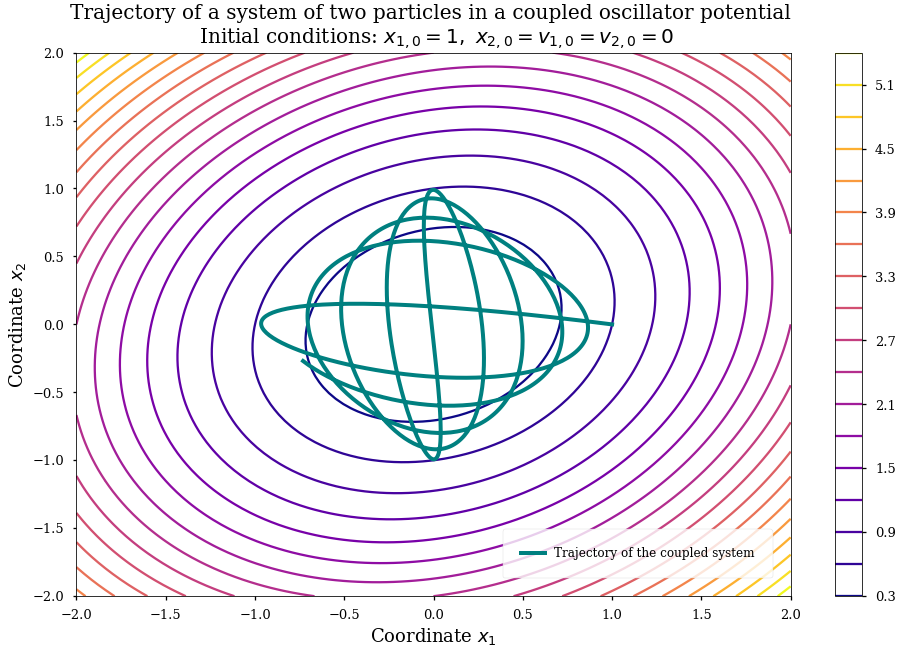

In [149]:
#Plotting the trajectories in the total potential
plt.plot(particle1, particle2, color='teal', linewidth = 4, label = 'Trajectory of the coupled system')
density_plot(x1,x2,V_total,const)
plt.title('Trajectory of a system of two particles in a coupled oscillator potential \n Initial conditions: $x_{1,0} = 1, \ x_{2,0} = v_{1,0} = v_{2,0} = 0$', size = 20)
plt.xlabel('Coordinate $x_1$', size = 18)
plt.ylabel('Coordinate $x_2$', size = 18)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='lower right')

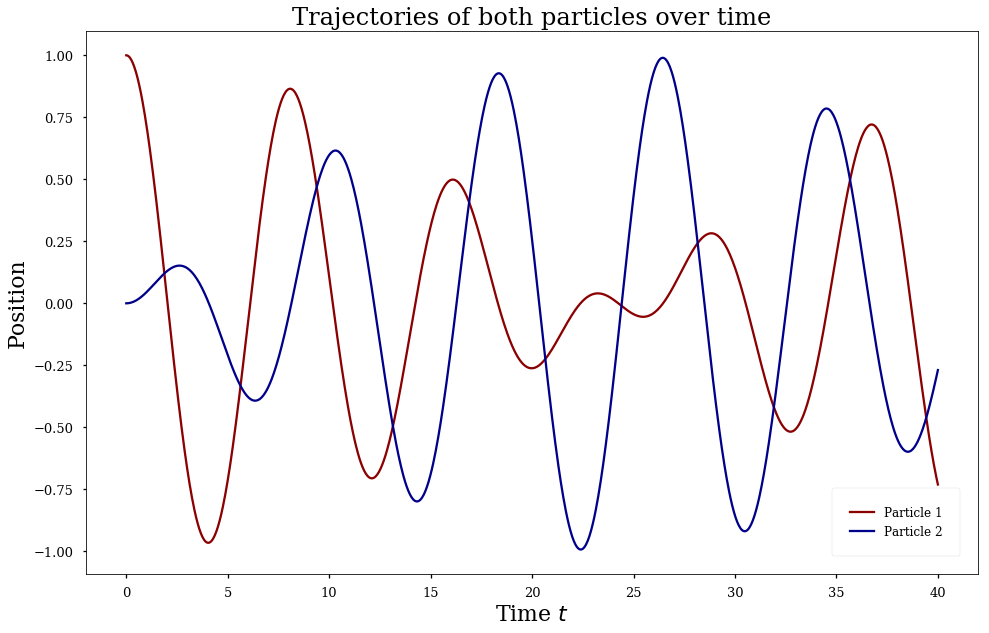

In [150]:
#Plotting both trajectories as a function of time
plt.plot(time, particle1, label="Particle 1", color = 'darkred')
plt.plot(time ,particle2, label="Particle 2", color = 'darkblue')
plt.ylabel("Position", size = 22)
plt.xlabel("Time $t$", size = 22)
plt.title("Trajectories of both particles over time", size = 24)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

### Exercise 2 (10 points)

What are the exact quantum mechanical eigenenergies? 
Calculate the ground state energy perturbatively to second order in $\lambda$. Use the decomposition into ladder operators
$$
x/x_{HO} = (a^\dagger + a)/\sqrt{2}
$$
Show that the same result is obtained by Taylor expanding the exact ground state energy $E_0 = \hbar\omega/2(1+\sqrt{1+2\lambda/k}) $ to second order in $\lambda/k$.

Plot the exact and perturbative ground state energy as a function of $\lambda/k$.

### Result from Taylor expanding around small $\frac{\lambda}{k}$

In the following calculation we substitute $\frac{\lambda}{k} =: \alpha$ and calculate the Taylor expansion around $\alpha_0 \approx 0$. <br> 

The ground state energy is defined as: $E_0 = \frac{\hbar\omega}{2}\left(1+\sqrt{\frac{2\lambda}{k}}\right)$. <br>

We get the following result for the expansion to second order in $\alpha$: <br>

\begin{align}
E_0\kern-0.3em\mid\kern-0.3em\small_{\alpha_0 = 0} &\approx \frac{\hbar\omega}{2} \left( 1 + \sqrt{2\cdot\alpha_0}\cdot\alpha^{0}
     + \frac{1}{1!}\cdot\frac{1}{2}\frac{2}{\sqrt{1+2\alpha_0}}\cdot \alpha^1 + \frac{1}{2!}\cdot\left(-\frac{1}{2}\right)\frac{2}{\sqrt{1+2\alpha_0}^3}\cdot \alpha^2 + \mathcal{O}\left(\alpha^3\right) \right) \\
     &=  \frac{\hbar\omega}{2} \left( 2 + \alpha - \frac{1}{2}\alpha^2 + \mathcal{O}\left(\alpha^3\right) \right) = \hbar\omega \left( 1 + \frac{\alpha}{2} - \frac{\alpha^2}{4}\right) + \mathcal{O}\left(\alpha^3\right)  
\end{align}

The final result of the expansion, reads: <br>
$$
E_0 \approx \hbar\omega \left( 1 + \frac{\lambda}{2k} - \frac{\lambda^2}{4k^2}\right) + \mathcal{O}\left(\frac{\lambda^3}{k^3}\right)
$$

### Result using perturbation theory

The idea of perturbation theory is to seperate the general Hamiltonian into the two unperturbed parts for both particles and a small perturbated part, e.g. : <br>
$$
\mathcal{H} = \underbrace{\mathcal{H}_1 + \mathcal{H}_2}_{:= \ \mathcal{H}_0} + V = \mathcal{H}_0 + \lambda\cdot\mathcal{H}_1
$$
The potential $V=\frac{1}{2}\left(x_1-x_2\right)^2$ corresponds to the harmonic oscillator problem, in this case for a system of two particles.

#### Finding the correct eigeneenergies

One computes the eigenenergies $E_n$ by finding the correction terms from perturbation theory: 

$$
E_n = E_n^0 + \lambda \ E_n^1 + \lambda^2 \ E_n^2 +\mathcal{O}\left(\lambda^3\right)
$$

#### Lowest order in unperturbed Hamiltonian

For this case we only have to consider the general solution of the harmonic oscillator problem and assume both particles occupying the groundstate $n=0$:

$$
E_0^0 = \hbar\omega\left( n_1 + n_2 + 1\right) = \hbar\omega 
$$

#### First order perturbation theory

\begin{align}
E^1_0 &= \langle n_1,n_2| \ \mathcal{H}_1 \ |n_1,n_2\rangle = \langle n_1,n_2|\frac12 ( x_1-x_2)^2|n_1,n_2\rangle
      = \frac{\hbar}{4m\omega}\langle n_1,n_2| \left(a^\dagger_1+a_1-(a^\dagger_2+a_2)\right)^2|n_1,n_2\rangle \\
      &= \frac{\hbar}{4m\omega} \langle n_1,n_2|\left(a^\dagger_1+a_1-(a^\dagger_2+a_2)\right)\left(\sqrt{n_1+1}|n_1+1,n_2\rangle+\sqrt{n_1}|n_1-1,n_2\rangle-\sqrt{n_2+1}|n_1,n_2+1\rangle-\sqrt{n_2}|n_1,n_2-1\rangle\right)
\end{align}


For the ground states we know that $n_1=n_2=0$:

$$
E^1_0=
\frac{\hbar}{4m\omega} \langle 0,0|\left(a^\dagger_1+a_1-a^\dagger_2-a_2\right)\left(|1,0\rangle-|0,1\rangle\right)=
\frac{\hbar}{2m\omega}=
\frac{\hbar\omega}{2k}
$$


#### Second order perturbation theory:
\begin{align}
E^2_{0,0}&=\sum_{m_1,m_2\neq 0}\frac{\left|\langle m^0_1,m^0_2|\ \mathcal{H}_1 \ |0,0\rangle\right|^2}{E_{0,0}^0-E_{m_1,m_2}^0} \\
&=\sum_{m_1,m_2\neq 0}\frac{\left|\langle0,0|\frac{\hbar}{4m\omega}\left(a_1-a_2\right)|m_1, m_2\rangle\right|^2}{-\hbar\omega(m_1+m_2)} \\
&=\left(\frac{\hbar}{4m\omega}\right)^2\left[\frac{|\sqrt{2}|^2}{-2\hbar\omega}+\frac{|-1|^2}{-2\hbar\omega}+\frac{|-1|^2}{-2\hbar\omega}+\frac{|\sqrt{2}|^2}{-2\hbar\omega}\right] \\
&=\frac{-3\hbar}{16m^2\omega^3}=
-\frac{3\hbar\omega}{16k^2}
\end{align}

We approximate the last term and get: <br>
$$
E_0 \approx \hbar\omega \left( 1 + \frac{\lambda}{2k} - \frac{\lambda^2}{4k^2}\right)
$$

#### Conclusion
Therefore we found (almost) the same result for both methods.

### Plotting the result 

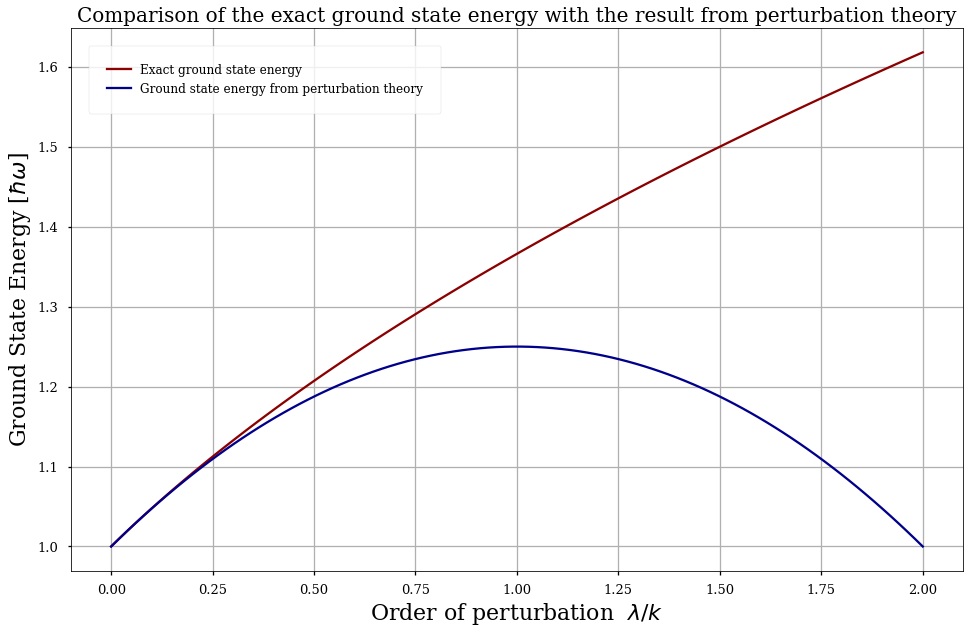

In [151]:
testrange = np.linspace(0,2,100)

#Exact round state energy
def E0(const):
    return (hbar*omega)/2*(1+np.sqrt(1+2*const/k))
#Result from perturbation theory
def E0_PT(const):
    return hbar*omega*(1+const/(2*k)-const**2/(4*k**2))

plt.plot(testrange, E0(testrange), label="Exact ground state energy", color = 'darkred')
plt.plot(testrange, E0_PT(testrange), label="Ground state energy from perturbation theory", color = 'darkblue')
plt.title("Comparison of the exact ground state energy with the result from perturbation theory", size = 20)
plt.ylabel("Ground State Energy [$\hbar\omega$]", size = 22)
plt.xlabel("Order of perturbation $\ \lambda/k$", size = 22)

plt.grid(True)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#### Conclusion
As one can see, the calculated approximation using perturbation theory holds for small $\frac{\lambda}{k}$.

### Exercise 3 (40 points)

Expand the Hamiltonian in the eigenbasis of the 2D harminic oscillators (use the same cutoff $N_1=N_2=N_{max}$ for both oscillator modes 1 and 2). 
For this, one can expand the perturbation term $\frac{1}{2}\lambda(x_1 - x_2)^2$ into ladder operators and then apply it to the unperturbed basis states.
How many non-zero elements will there be at most in each row? 

There are many ways of building the Hamiltonian matrix in the chosen basis. First, make sure you understand what the basis states are and how one would order them in a reasonable way.
A failsafe way to build up the Hamiltonian matrix is to iterate over all states of the bare basis and determine the matrix-elments it couples to. Another, arguably more elegant, way is to build the matrix representing the anihilation operator on the Hilbert space of one of the oscillators. The creation operator is then simply the transpose of that and the position operator can be built by adding the two. We have a 2D problem so we work in a Hilbert space that is a tensor product of the two Hilbert spaces of the oscillators. Thus, to represent the position operator $\hat{x}_1$ acting on oscillator 1 in the full Hilbert space  we have to use $\hat{x}_1 \otimes \mathbf{1}$, where $\mathbf{1}$ is the identity acting on the second subspace (see the numpy "eye" function). This can be achieved by using the Kronecker product. For multiplying or squaring operators you can use the numpy dot product function.
The second method might be less efficient if you want to exploit the sparsity of the problem but it is very handy since it requires only to build one operator explicitly and the rest is matrix algebra (or two if you use different basis sizes for the two oscillators).

Diagonalize the Hamiltonian and check your result by comparing the ground state energy to the exact result. How small can you make the basis such that the ground sate energy still converged? (You should find that $N_1=N_2=5$, i.e. 25 basis states, is sufficient to get the ground state with good precision up to $\lambda=2$. Note that using a simple spatial grid to represent the wave function we would need much larger basis sizes!) Also look at some excited states, at least the lowest 6, make sure that your diagonalization results agree with the exact one, and understand the structure of the spectrum.

Bonus (not graded): This is of course still a problem that can be solved analytically, and thus we are complicating it by doing the basis set expansion. However, one could now use this method to apply it to non-integrable cases like a quartic (non-linear) coupling or even the quantum version of the Henon-Heiles problem, which does not separate and is classically chaotoic!
If you want to go beyond, try other potentials!

### Solution:
#### Non-zero elements in each row
With this method one finds at most $3$ non-zero elements in each row. This can easily be seen by writing down a general matrix multiplication of the form of our problem. These non-zero entries are located on the main diagonal and the respective second next diagonals. <br>

In [57]:
#Implementation of x1- and x2-operators with N_cut = N
def x_ops(N): 
    #Creating the identity Matrix with dim = N x N
    identity = np.eye(N)
    #Matrix representation of the ladder operators
    values = np.sqrt(np.linspace(1,N-1,N-1))
    a = np.diag(values,1)
    a_dagger = np.diag(values,-1)
    #Computing final result using the tensor product
    x1 = 1/np.sqrt(2)*(np.kron(a,identity)+np.kron(a_dagger,identity))
    x2 = 1/np.sqrt(2)*(np.kron(identity,a)+np.kron(identity,a_dagger))
    return x1, x2

def perturbation(N,const):
    x1, x2 = x_ops(N)
    H1 = (const/2) * (np.dot(x1,x1)-np.dot(x1,x2)-np.dot(x2,x1)+np.dot(x2,x2))
    return H1, x1, x2

#Now we want to compute the eigenenergies
def eigenenergies(N,const):
    H1, x1, x2 = perturbation(N,const)
    #Unperturbed Hamiltonian H_0
    H0 = np.diag(np.linspace((hbar*omega)/2,hbar*omega*(N-1/2),N))
    identity = np.eye(N)
    #Applying the tensor product again
    H0_tensor = np.kron(H0,identity)+np.kron(identity,H0)
    eigvals, eigvecs = LA.eig(H0_tensor + H1)
    return eigvals,eigvecs

In [123]:
#Comparing some values for N
Nvals = np.linspace(2,10,9, dtype=int)
const = 2

#We directly compare the theoretical with the numerical values for all considered values for N
print("Energy for the ground state (theoretical):", E0(const))
print()
print('Numerical values for different N:')

for N in Nvals:
    vals, vecs = eigenenergies(N, const)
    print('For N =', N, ': ', sorted(vals)[0], ' , Difference to theoretical value = ', np.abs(sorted(vals)[0]-E0(const)) )

Energy for the ground state (theoretical): 1.61803398875

Numerical values for different N:
For N = 2 :  1.58578643763  , Difference to theoretical value =  0.032247551123
For N = 3 :  1.5748352925  , Difference to theoretical value =  0.0431986962489
For N = 4 :  1.61723525671  , Difference to theoretical value =  0.000798732040295
For N = 5 :  1.61663936756  , Difference to theoretical value =  0.0013946211869
For N = 6 :  1.6180001152  , Difference to theoretical value =  3.38735513465e-05
For N = 7 :  1.61798832975  , Difference to theoretical value =  4.5658998066e-05
For N = 8 :  1.61803186541  , Difference to theoretical value =  2.12333610228e-06
For N = 9 :  1.61803237262  , Difference to theoretical value =  1.61613160099e-06
For N = 10 :  1.61803385578  , Difference to theoretical value =  1.32965591426e-07


#### Conclusion
We found out that we have to choose at least $N=4$ to get a sufficient precision for the ground state energy.

#### Excitation states

In [122]:
#Testing some exitation states
excitation = np.linspace(1,6,6, dtype=int)
for state in excitation:
    print(state,'. excited state: E = ',sorted(vals)[state])

1 . excited state: E =  2.61802723699
2 . excited state: E =  3.61807359778
3 . excited state: E =  3.85409571552
4 . excited state: E =  4.61725673509
5 . excited state: E =  4.85407373673
6 . excited state: E =  5.62139155209


We chose the ordering of the excitation states depending on the value of their respective energy level.

### Exercise 4 (30 points)

Calculate the time evolution for different initial conditions: 1) oscillator 1 in the first excited state, oscillator two in its ground state $|0\rangle$; 2) oscillator 1 in $|\psi_0\rangle = (|0\rangle+|1\rangle)/\sqrt(2)$, oscillator two in state $|0\rangle$;  3) oscillator 1 in a coherent state (e.g. with $\langle n \rangle = |\alpha|^2 = 2$) and oscillator 2 in $|0\rangle$. Example parameters: $\lambda=0.2$, $N_1=N_2=10$, $t_f = 40$.

Monitor the dynamics by calculating $\langle x_1 \rangle$ and $\langle x_2 \rangle$, the energy expectation value of each oscillator, as well as the probabilities for each oscillator to be in state $|n\rangle$. Compare your observations to the classical expectation: propagate a classical particle with $x_{i0}=\langle x_i(t=0) \rangle$ and $p_{i0}=\langle p_i(t=0) \rangle$. Describe and interpret your observations.

Bonus (not graded): Represent the wave function on a 2D spatial grid using the exact harmonic oscillator eigenfunctions. Animate the time-dependence of the wave packet.

### Analytical solution

As usual the time evolutions are given by:


1)
\begin{align}
\left| \ \Psi_1(t) \ \right\rangle = e^{-i E_{1,0}t}(\left| 1 \right\rangle \otimes \left| 0 \right\rangle )\\
\end{align}

2)
\begin{align}
\left| \ \Psi_2(t) \ \right\rangle = \frac{1}{\sqrt{2}} \left(  e^{-i E_{0,0}t}(\left| 0 \right\rangle \otimes \left| 0 \right\rangle) + e^{-i E_{1,0}t}(\left| 1 \right\rangle \otimes \left| 0 \right\rangle)\right)
\end{align}

3)
The coherent state is described by:

\begin{align}
\left| \ \Psi_3(t=0) \ \right\rangle = e^{-\frac{1}{2}|z|^2}e^{za^{\dagger{}}}\left| 0 \right\rangle
\end{align}

Since we want $\left\langle n \right\rangle = 2 $, we get $z = \sqrt{2}$.

#### x expectation values:
For the first case we have no time dependency for $\left\langle x_i \right\rangle$, as $\left\langle \ \Psi(t) \ \middle| \ x\ \middle| \ \Psi(t) \ \right\rangle $ (with $x$ being either $\hat{x}_1 \otimes \mathbf{1}$ or $\mathbf{1} \otimes \hat{x}_2$) makes the complex rotation go away. Since we have an orthogonal basis, which means that the scalar products vanish after applying the $x$-Operators, we obtain an expectation value of 0 in both instances. For the second particle this is also true in all further systems. <br>
This means for the first system:

\begin{align}
\left\langle x_1 \right\rangle =0
\end{align}

And in all systems:

\begin{align}
\left\langle x_2 \right\rangle =0
\end{align}

After applying $\hat{x}_1 \otimes \mathbf{1}$ we get the following for the time evolution of system two:

\begin{align}
x\left| \ \Psi_2(t) \ \right\rangle =  \frac{1}{2} \left( e^{-i E_{1,0}t}((\left| 0 \right\rangle + \sqrt{2} \left| 2 \right\rangle) \otimes \left| 0 \right\rangle) + e^{-i E_{0,0}t}(\left| 1 \right\rangle \otimes \left| 0 \right\rangle) \right)
\end{align}

This results in an expectation value of:

\begin{align}
\frac{1}{2\sqrt{2}} (e^{it(E_{1,0}-E_{0,0})}+e^{it(E_{0,0}-E_{1,0})}) =
\frac{1}{\sqrt{2}} cos((E_{1,0}-E_{0,0})t)
\end{align}

Also in the last system we have an oscillation of the expectation value with:

\begin{align}
\sqrt{2} \ Re \left\{ \sqrt{2}e^{-iEt} \right\}
\end{align}

#### Energy expectation values:

The first two systems are formulated in the energy eigenbasis. Therefore the expectation value for their respective energies is constant in time.  <br>

For the first system we find: $\langle E \rangle = E_{1,0}$ <br>

The second system is a bit more complicated: $\langle E \rangle =  \frac{1}{2} \cdot (E_{0,0} + E_{1,0})$ <br>

The coherent state also has a constant energy expectation value, e.g. $\langle E \rangle = E_{0,0} + \hbar\omega\mid\kern-0.2em\alpha\kern-0.2em\mid^2  = E_{0,0} + 2\hbar\omega$ 

__We were not sure, which parts of this exercise were supposed to be solved numerically and which parts were supposed to be solved analytically.__

### Dynamics

#### Second example

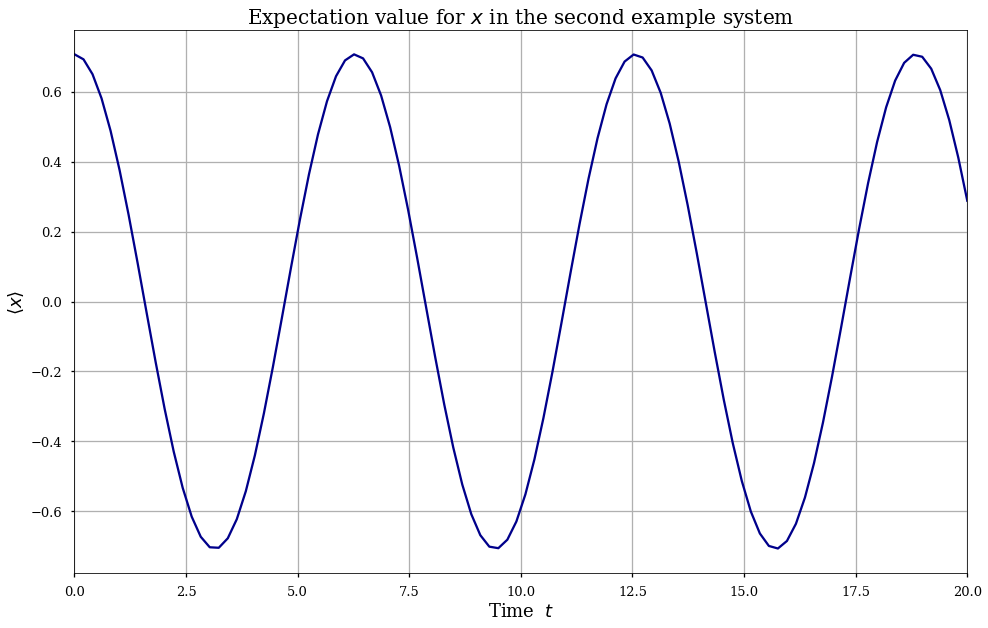

In [152]:
#Calculating important values
N=5
vals2, vecs2 = eigenenergies(N,const)
vals2 = sorted(vals2)
E00 = vals2[0]
E10 = vals2[1]

def expval_x(t,E00,E10):
    return 1/np.sqrt(2)*np.cos((E10-E00)*t)

timesteps = np.linspace(0,20,100)

#Plotting the result
plt.plot(timesteps ,expval_x(timesteps,E00,E10), color = 'darkblue')
plt.title('Expectation value for $x$ in the second example system', size = 20)
plt.xlabel('Time  $t$', size = 18)
plt.ylabel(r'$ \langle x \rangle $', size = 18)
plt.xlim(0,20)
plt.grid(True)

#### Interpretation of the probabilities for states $|n\rangle$

The probability to detect particle two in state $|0\rangle$ is always 1. <br> 
In the first system, we detect $x_1$ with a probabilty of 1 ( = 100% ) in the first excitation state and in the second system with a probability of $\frac{1}{2}$ in either state of the superposition, e.g  $ |0\rangle$ and $ |1\rangle$.